In [1]:
import requests
import json
import pandas as pd
import time
from datetime import datetime
from os import path
import requests
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np; np.random.seed(0)
from datetime import date
import scipy.stats

C:\Users\szany\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from __future__ import print_function
import matplotlib.ticker as ticker
from colour import Color

In [3]:
color1 = '#%02x%02x%02x' % (25, 114, 120)
color2 = '#%02x%02x%02x' % (237, 221, 212)
color3 = '#%02x%02x%02x' % (196, 69, 54)

#### HOPR - ETH - BTC databases

#### The dataframes are based on the daily, aggregated data provided by Uniswap about the three token's price and about the daily trading volume, liquidity and transactions of HOPR. 

#### HOPR

In [4]:
url = 'https://api.thegraph.com/subgraphs/name/uniswap/uniswap-v2'

data_h = '''
query {
tokenDayDatas(where:{token: "0xf5581dfefd8fb0e4aec526be659cfab1f8c781da"}, orderBy:date, orderDirection:desc)
  {
    id
    date
    priceUSD
    totalLiquidityToken
    totalLiquidityUSD
    totalLiquidityETH
    dailyVolumeETH
    dailyVolumeToken
    dailyVolumeUSD
    dailyTxns
  }
}
'''

response_h = requests.post(url,json={'query': data_h})
data_h = json.loads(response_h.text)

In [5]:
df_h = pd.DataFrame((pd.DataFrame(data_h)).iloc[0][0])

In [6]:
df_h2 = df_h.rename(columns = {'id': 'id_h', 'date': 'date', 'priceUSD': 'priceUSD_h',
    'totalLiquidityToken': 'totalLiquidityToken_h',
    'totalLiquidityUSD': 'totalLiquidityUSD_h',
    'totalLiquidityETH': 'totalLiquidityETH_h',
    'dailyVolumeETH': 'dailyVolumeETH_h',
    'dailyVolumeToken': 'dailyVolumeToken_h',
    'dailyVolumeUSD': 'dailyVolumeUSD_h',
    'dailyTxns': 'dailyTxns_h' }, inplace = False)

In [7]:
#final HOPR dataframe = df_h2
df_h2.head(5)

,dailyTxns_h,dailyVolumeETH_h,dailyVolumeToken_h,dailyVolumeUSD_h,date,id_h,priceUSD_h,totalLiquidityETH_h,totalLiquidityToken_h,totalLiquidityUSD_h
0,34,58.88689453650312420165195091098944,420176.070769302279795121,197254.484627818605194316118993611,1621209600,0xf5581dfefd8fb0e4aec526be659cfab1f8c781da-18764,0.4947167573842431640968973121985595,4936.986773752538520315300409897701,34114333.217646438236763873,16876932.30975962043369697668298057
1,43,93.5760197798274468247894286738408,634972.281297528789487154,346240.0628218093912441933526845051,1621123200,0xf5581dfefd8fb0e4aec526be659cfab1f8c781da-18763,0.4743022435427588121070825976228462,4608.959733055546552807871122404189,33778590.622604473284741011,16021261.31601369590176248268520664
2,32,41.60990523209353352360193094980088,303114.864411068937136874,159631.4897592746503587809305742094,1621036800,0xf5581dfefd8fb0e4aec526be659cfab1f8c781da-18762,0.5971991424780645357656464571929884,5238.350240928966749215425480684747,33390940.335598362564910578,19941040.9349555585706857468049728
3,26,25.26253111269149862865829792196369,191230.446233471205447673,100524.3598181123535736021459433809,1620950400,0xf5581dfefd8fb0e4aec526be659cfab1f8c781da-18761,0.542553458351832637512505215261298,4411.874955308175101970490367273219,33254354.145758790754641373,18042264.84703803508570633411800208
4,51,115.6606109497610330510057045814645,874533.141536707641191286,435893.7476314845214167319826467109,1620864000,0xf5581dfefd8fb0e4aec526be659cfab1f8c781da-18760,0.4887669703654160123143948456337602,4396.728346025124714733354966416325,33178661.777657749207090031,16216633.99784460605768902263314852


#### ETH 

In [8]:
url = 'https://api.thegraph.com/subgraphs/name/uniswap/uniswap-v2'

data_e = '''
query {
tokenDayDatas(where:{token: "0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2"}, orderBy:date, orderDirection:desc)
  {
    id
    date
    priceUSD

  }
}
'''
response_e = requests.post(url,json={'query': data_e})
data_e = json.loads(response_e.text)

In [9]:
df_e = pd.DataFrame((pd.DataFrame(data_e)).iloc[0][0])

In [10]:
df_e2 = df_e.rename(columns = {'id': 'id_e', 'date': 'date', 'priceUSD': 'priceUSD_e'}, inplace = False)

In [11]:
#final ETH dataframe = df_e2
df_e2.head(5)

,date,id_e,priceUSD_e
0,1621209600,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2-18764,3383.893821800933816743661976819875
1,1621123200,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2-18763,3583.761902937442837011855365996189
2,1621036800,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2-18762,3642.534557340145099178216825384355
3,1620950400,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2-18761,4086.183276226421659946966013677462
4,1620864000,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2-18760,3721.098365449099349776485031577454


#### BTC (wrapped bitcoin)

In [12]:
url = 'https://api.thegraph.com/subgraphs/name/uniswap/uniswap-v2'
#url = 'https://api.thegraph.com/subgraphs/name/ianlapham/uniswapbackup'

data_b = '''
query {
tokenDayDatas(where:{token: "0x2260fac5e5542a773aa44fbcfedf7c193bc2c599"}, orderBy:date, orderDirection:desc)
  {
    id
    date
    priceUSD

  }
}
'''
response_b = requests.post(url,json={'query': data_b})
data_b = json.loads(response_b.text)

In [13]:
df_b = pd.DataFrame((pd.DataFrame(data_b)).iloc[0][0])

In [14]:
df_b2 = df_b.rename(columns = {'id': 'id_b', 'date': 'date', 'priceUSD': 'priceUSD_b'}, inplace = False)

In [15]:
#final BTC dataframe = df_b2
df_b2.head(5)

,date,id_b,priceUSD_b
0,1621209600,0x2260fac5e5542a773aa44fbcfedf7c193bc2c599-18764,44364.89344443315710851328722521032
1,1621123200,0x2260fac5e5542a773aa44fbcfedf7c193bc2c599-18763,46217.52287689619858590020926863487
2,1621036800,0x2260fac5e5542a773aa44fbcfedf7c193bc2c599-18762,46765.72110675161796095897174548189
3,1620950400,0x2260fac5e5542a773aa44fbcfedf7c193bc2c599-18761,49987.73483631093299167421024352277
4,1620864000,0x2260fac5e5542a773aa44fbcfedf7c193bc2c599-18760,49575.24117970996895706532647106105


In [16]:
df_mer = pd.merge(pd.merge(df_h2,df_e2,on='date'),df_b2,on='date')

In [17]:
df_mer[['dailyVolumeETH_h', 'dailyVolumeToken_h', 'dailyVolumeUSD_h', 'priceUSD_h', 'totalLiquidityETH_h', 'totalLiquidityToken_h',
       'totalLiquidityUSD_h', 'priceUSD_e', 'priceUSD_b', 'date', 'dailyTxns_h']] = df_mer[['dailyVolumeETH_h', 'dailyVolumeToken_h', 'dailyVolumeUSD_h', 'priceUSD_h', 'totalLiquidityETH_h', 'totalLiquidityToken_h',
       'totalLiquidityUSD_h', 'priceUSD_e', 'priceUSD_b', 'date', 'dailyTxns_h']].apply(pd.to_numeric)

In [18]:
df_mer['date_r'] = pd.to_datetime(df_mer['date'], unit='s').apply(lambda x: x.date())

In [19]:
import calendar

In [20]:
df_mer["weekday"] = df_mer['date_r'].apply(lambda x: calendar.day_name[x.weekday()])

In [21]:
#merged dataframe, containing the data of the HOPR, ETH, BTC tokens - df_mer
df_mer.head(5)

,dailyTxns_h,dailyVolumeETH_h,dailyVolumeToken_h,dailyVolumeUSD_h,date,id_h,priceUSD_h,totalLiquidityETH_h,totalLiquidityToken_h,totalLiquidityUSD_h,id_e,priceUSD_e,id_b,priceUSD_b,date_r,weekday
0,34,58.886895,420176.070769,197254.484628,1621209600,0xf5581dfefd8fb0e4aec526be659cfab1f8c781da-18764,0.494717,4936.986774,3.411433e+07,1.687693e+07,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2-18764,3383.893822,0x2260fac5e5542a773aa44fbcfedf7c193bc2c599-18764,44364.893444,2021-05-17,Monday
1,43,93.576020,634972.281298,346240.062822,1621123200,0xf5581dfefd8fb0e4aec526be659cfab1f8c781da-18763,0.474302,4608.959733,3.377859e+07,1.602126e+07,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2-18763,3583.761903,0x2260fac5e5542a773aa44fbcfedf7c193bc2c599-18763,46217.522877,2021-05-16,Sunday
2,32,41.609905,303114.864411,159631.489759,1621036800,0xf5581dfefd8fb0e4aec526be659cfab1f8c781da-18762,0.597199,5238.350241,3.339094e+07,1.994104e+07,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2-18762,3642.534557,0x2260fac5e5542a773aa44fbcfedf7c193bc2c599-18762,46765.721107,2021-05-15,Saturday
3,26,25.262531,191230.446233,100524.359818,1620950400,0xf5581dfefd8fb0e4aec526be659cfab1f8c781da-18761,0.542553,4411.874955,3.325435e+07,1.804226e+07,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2-18761,4086.183276,0x2260fac5e5542a773aa44fbcfedf7c193bc2c599-18761,49987.734836,2021-05-14,Friday
4,51,115.660611,874533.141537,435893.747631,1620864000,0xf5581dfefd8fb0e4aec526be659cfab1f8c781da-18760,0.488767,4396.728346,3.317866e+07,1.621663e+07,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2-18760,3721.098365,0x2260fac5e5542a773aa44fbcfedf7c193bc2c599-18760,49575.241180,2021-05-13,Thursday


#### HOPR - ETH/BTC price 

In [22]:
price_corr = df_mer[["priceUSD_h", "priceUSD_e", "priceUSD_b"]]

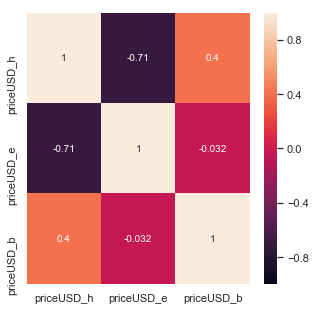

In [23]:
plt.figure(figsize=(5,5))
heatmap = sns.heatmap(price_corr.corr(), vmin=-1, vmax=1, annot=True)
plt.show()

#### HOPR - ETH price

In [24]:
d_e = df_mer['priceUSD_e']
d_h = df_mer['priceUSD_h']
d_b = df_mer['priceUSD_b']
time = df_mer['date_r']
weekday = df_mer['weekday']
usdvol = df_mer['dailyVolumeUSD_h']
Txns = df_mer['dailyTxns_h']

In [25]:
t = list(time)

C:\Users\szany\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:2062: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\szany\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:248: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\szany\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:250: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


Text(0.5,1,'ETH daily USD price')

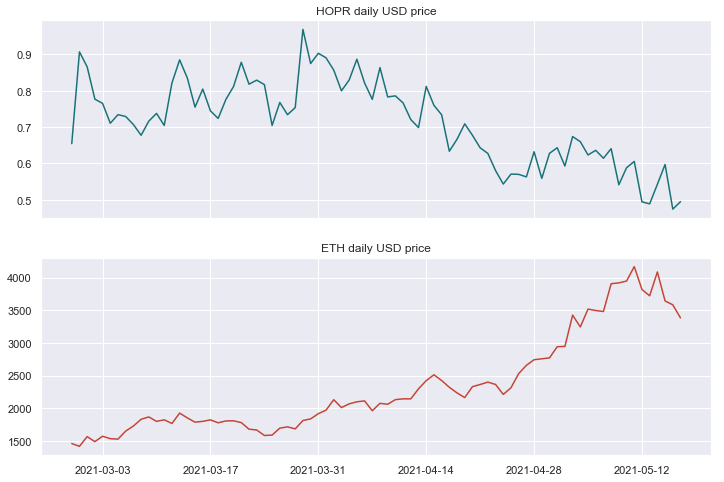

In [26]:
fig, axs = plt.subplots(2, sharex = True, figsize=(12, 8))
axs[0].plot(time, d_h, color=color1)
axs[0].set_title('HOPR daily USD price')
axs[1].plot(time, d_e, color=color3)
axs[1].set_title('ETH daily USD price')

C:\Users\szany\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


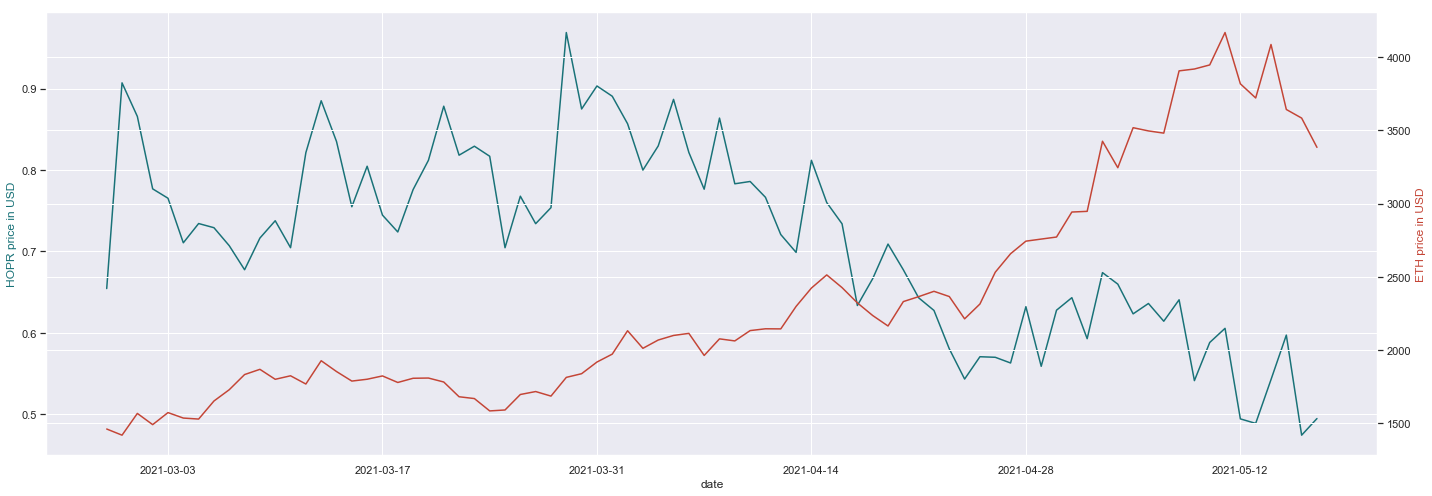

In [27]:
plt.figure(figsize=(20,7))

fig1 = plt.figure(1)
ax1 = fig1.add_subplot(111)
ax1.plot(time, d_h, color=color1)
ax1.set_xlabel('date')
ax1.set_ylabel('HOPR price in USD', color=color1)
ax1.grid(True)

ax2 = ax1.twinx()
ax2.plot(time, d_e, color=color3)
ax2.set_ylabel("ETH price in USD", color=color3)

fig1.set_tight_layout(True)
plt.show()

In [28]:
## Scaled price chart

In [29]:
from sklearn.preprocessing import QuantileTransformer

In [30]:
df_sc = df_mer[["priceUSD_h", 'priceUSD_e', 'priceUSD_b']]

In [31]:
scaler = QuantileTransformer(output_distribution='uniform')
scaled_df = scaler.fit_transform(df_sc)
scaled_df = (pd.DataFrame(scaled_df, columns=df_sc.columns)).reset_index()

C:\Users\szany\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:2239: UserWarning: n_quantiles (1000) is greater than the total number of samples (80). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


In [32]:
ind_ti = (df_mer['date_r']).reset_index()

In [33]:
df_scd = pd.merge(scaled_df,ind_ti,on='index')

In [34]:
#scaled dataframe - df_scd
df_scd.head(5)

,index,priceUSD_h,priceUSD_e,priceUSD_b,date_r
0,0,0.037975,0.835443,0.000000,2021-05-17
1,1,0.000000,0.898734,0.037975,2021-05-16
2,2,0.177215,0.911392,0.050633,2021-05-15
3,3,0.063291,0.987342,0.164557,2021-05-14
4,4,0.012658,0.924051,0.139241,2021-05-13


In [35]:
j = df_scd["priceUSD_h"]
k = df_scd["priceUSD_e"]
l = df_scd["priceUSD_b"]

In [36]:
corr_h_e = j.corr(k)
corr_h_b = j.corr(l)

In [37]:
df_scd['corr_h_e'] = (df_scd['index']*corr_h_e/-100)+0.5
df_scd['corr_h_b'] = (df_scd['index']*corr_h_b/-100)+0.5

In [38]:
c_h_e = df_scd['corr_h_e']
c_h_b = df_scd['corr_h_b']

C:\Users\szany\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:2062: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\szany\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:248: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\szany\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:250: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
C:\Users\szany\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be

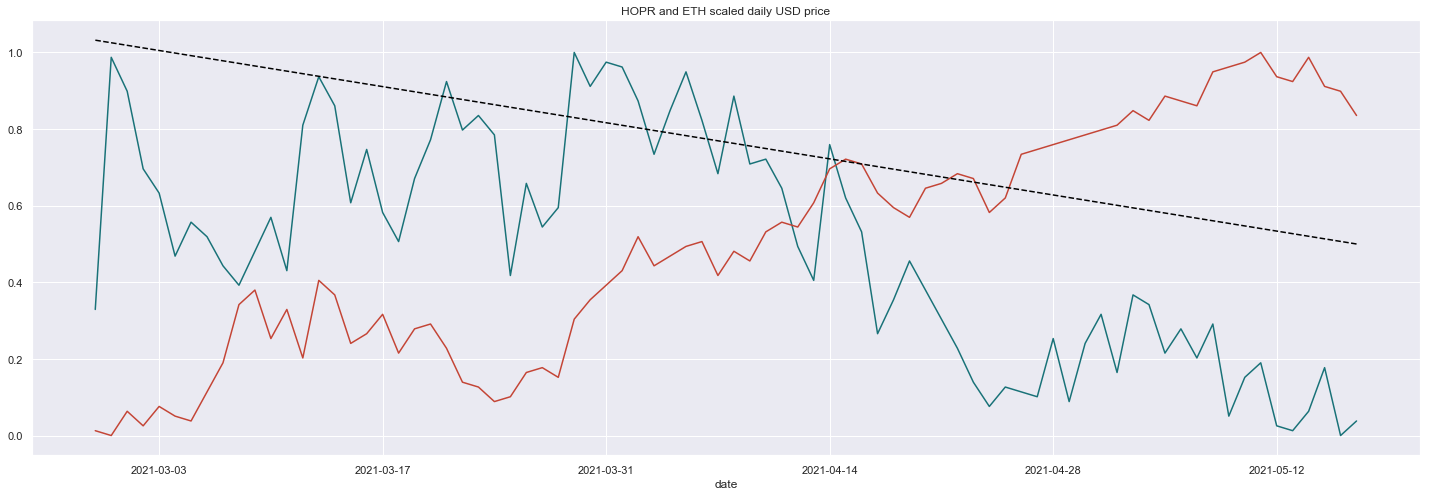

In [39]:
plt.figure(figsize=(20,7))

fig1 = plt.figure(1)
ax1 = fig1.add_subplot(111)
ax1.plot(time, j, color=color1)
ax1.set_xlabel('date')
ax1.grid(True)
ax1.set_title('HOPR and ETH scaled daily USD price')

ax2 = ax1
ax2.plot(time, k, color=color3)

ax3 = ax1
ax2.plot(time, c_h_e, color="black", linestyle='dashed')

fig1.set_tight_layout(True)
plt.show()

In [40]:
#subset of data identifying the turning point of the correlation trend

In [41]:
df_scd["wh"] = df_scd["priceUSD_h"] == df_scd["priceUSD_e"]

In [42]:
df_scd2 = (df_scd.sort_values(by="date_r")).reset_index()

In [43]:
alt_df = df_scd2.iloc[0:35, ]

In [44]:
alt_df['priceUSD_h'].corr(alt_df['priceUSD_e'])

0.2898571142855493

#### HOPR - BTC price 

C:\Users\szany\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:2062: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\szany\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:248: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\szany\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:250: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


Text(0.5,1,'BTC daily USD price')

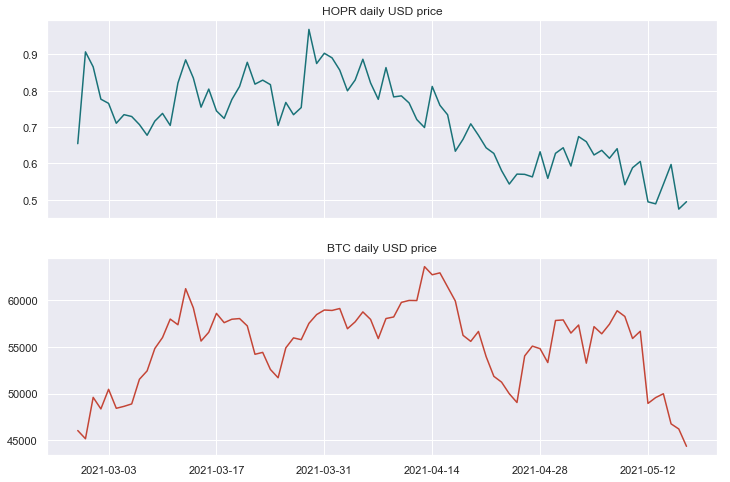

In [45]:
fig, axs = plt.subplots(2, sharex = True, figsize=(12, 8))
axs[0].plot(time, d_h, color=color1)
axs[0].set_title('HOPR daily USD price')
axs[1].plot(time, d_b, color=color3)
axs[1].set_title('BTC daily USD price')

C:\Users\szany\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


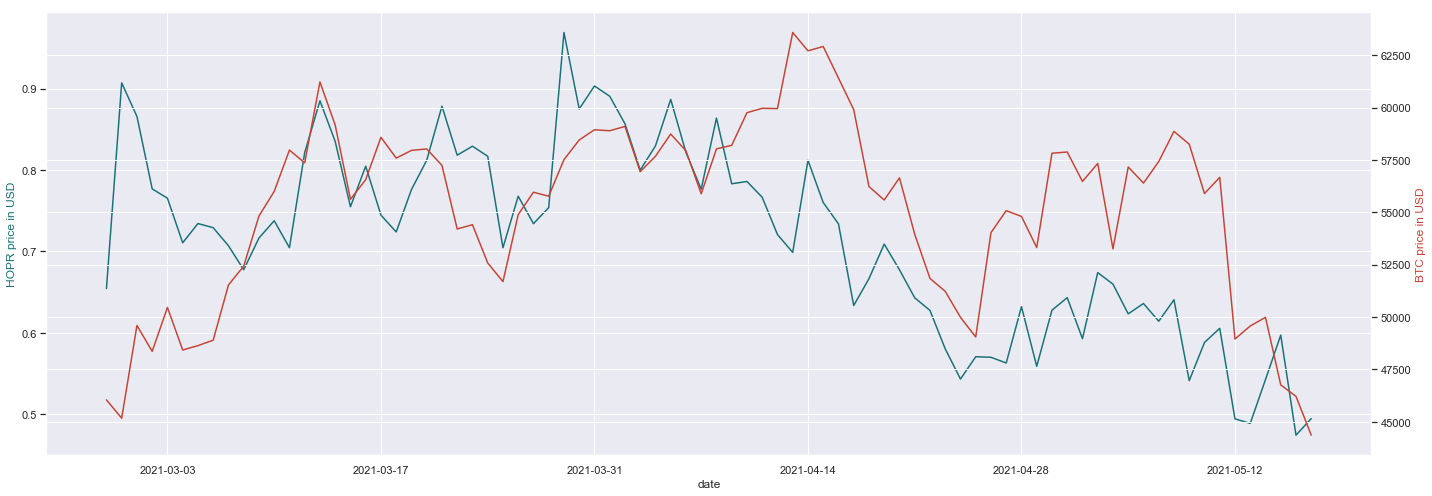

In [46]:
plt.figure(figsize=(20,7))

fig1 = plt.figure(1)
ax1 = fig1.add_subplot(111)
ax1.plot(time, d_h, color=color1)
ax1.set_xlabel('date')
ax1.set_ylabel('HOPR price in USD', color=color1)
ax1.grid(True)

ax2 = ax1.twinx()
ax2.plot(time, d_b, color=color3)
ax2.set_ylabel("BTC price in USD", color=color3)

fig1.set_tight_layout(True)
plt.show()

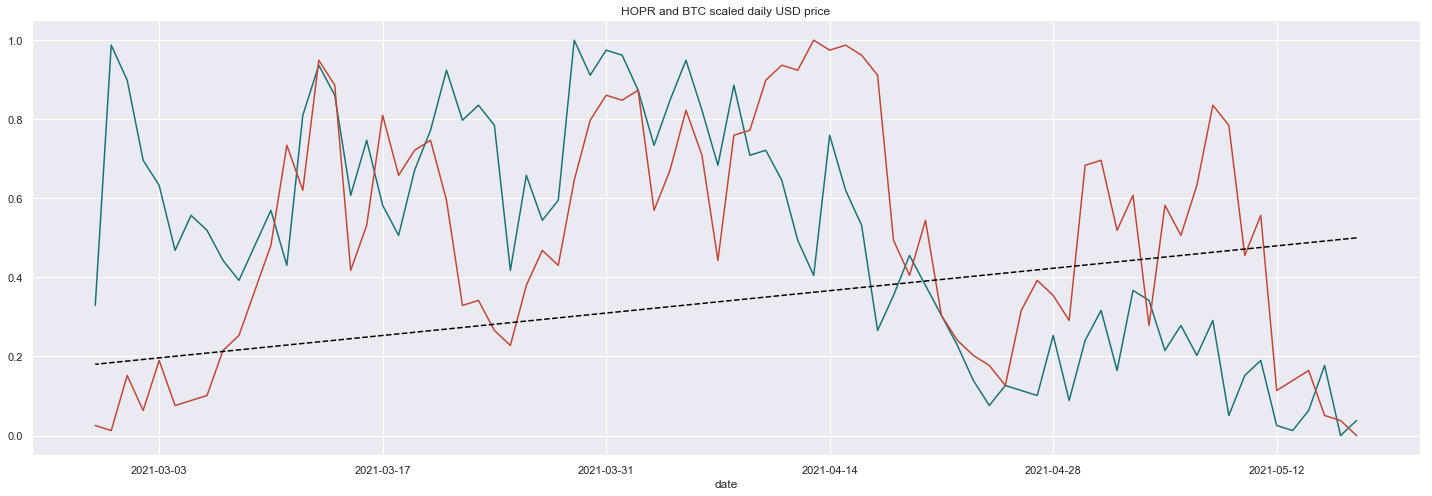

In [47]:
plt.figure(figsize=(20,7))

fig1 = plt.figure(1)
ax1 = fig1.add_subplot(111)
ax1.plot(time, j, color=color1)
ax1.set_xlabel('date')
ax1.grid(True)
ax1.set_title('HOPR and BTC scaled daily USD price')

ax2 = ax1
ax2.plot(time, l, color=color3)

ax3 = ax1
ax2.plot(time, c_h_b, color="black", linestyle='dashed')

fig1.set_tight_layout(True)
plt.show()

#### HOPR and Twitter activity

#### Source: Most popular tweets between the launch of HOPR and middle of April.

In [48]:
path = "C:/Users/szany/Desktop/"

In [49]:
tf_s = pd.read_excel(path + '/tweets.xlsx')

In [50]:
#sorted dataframe to identify the most popular tweets 

In [51]:
tf_s = tf_s.sort_values('likes', ascending=False, ignore_index=True)

In [52]:
tf_s.head(10)

,Unnamed: 0,Tweet id,Tweet permalink,Tweet text,time,impressions,engagements,engagement rate,retweets,replies,...,promoted hashtag clicks,promoted detail expands,promoted permalink clicks,promoted app opens,promoted app installs,promoted follows,promoted email tweet,promoted dial phone,promoted media views,promoted media engagements
0,0,1375428085013680128,https://twitter.com/hoprnet/status/13754280850...,@cz_binance @binance $HOPR\n\nhttps://t.co/0Oe...,2021-03-26 12:43 +0000,279062,12143,0.043514,586,352,...,-,-,-,-,-,-,-,-,-,-
1,1,1363916875634204928,https://twitter.com/hoprnet/status/13639168756...,Phase 1 of the $HOPR token launch is almost ov...,2021-02-22 18:21 +0000,111085,9256,0.083324,539,81,...,-,-,-,-,-,-,-,-,-,-
2,2,1376876252716528128,https://twitter.com/hoprnet/status/13768762527...,"@CiaraHuobi @HuobiGlobal 🙋‍♀️ Community, @Ciar...",2021-03-30 12:37 +0000,7844,1192,0.151963,110,62,...,-,-,-,-,-,-,-,-,-,-
3,3,1360906640179002880,https://twitter.com/hoprnet/status/13609066401...,T-minus 10 days to launch 🚀\n\n$HOPR 🌕\n\n➡️ h...,2021-02-14 11:00 +0000,165664,8482,0.051200,100,24,...,-,-,-,-,-,-,-,-,-,-
4,4,1366373152989851904,https://twitter.com/hoprnet/status/13663731529...,🦄 HOPR Dai is top 20 Uniswap pool\n\n💰️ 100% o...,2021-03-01 13:02 +0000,96425,4204,0.043599,62,17,...,-,-,-,-,-,-,-,-,-,-
5,5,1375428823609716992,https://twitter.com/hoprnet/status/13754288236...,"🟡 Community, aren't you tired of 'wen Binance?...",2021-03-26 12:46 +0000,23440,2007,0.085623,53,16,...,-,-,-,-,-,-,-,-,-,-
6,6,1376142022373999104,https://twitter.com/hoprnet/status/13761420223...,$HOPR mining on @Uniswap\n\nStarting this Tues...,2021-03-28 12:00 +0000,22623,1897,0.083853,57,5,...,-,-,-,-,-,-,-,-,-,-
7,7,1366010765107420928,https://twitter.com/hoprnet/status/13660107651...,It \nIs\nTime \n🦄\n\n➡️ https://t.co/hxJfIw5Uo...,2021-02-28 13:02 +0000,35760,2194,0.061353,51,13,...,-,-,-,-,-,-,-,-,-,-
8,8,1375840042166362112,https://twitter.com/hoprnet/status/13758400421...,"🎂 Happy HOPR Day! 🎂\n\n🇨🇭 One year ago today, ...",2021-03-27 16:00 +0000,15791,948,0.060034,44,9,...,-,-,-,-,-,-,-,-,-,-
9,9,1371056512395788032,https://twitter.com/hoprnet/status/13710565123...,We present the founders of the HOPR Protocol🔥\...,2021-03-14 11:12 +0000,23021,1506,0.065419,30,17,...,-,-,-,-,-,-,-,-,-,-


In [53]:
a = t.index(date(2021, 2, 28))
b = t.index(date(2021, 3, 1))
c = t.index(date(2021, 3, 14))
d = t.index(date(2021, 3, 26))
e = t.index(date(2021, 3, 28))
f = t.index(date(2021, 3, 30))
h = t.index(date(2021, 4, 4))

C:\Users\szany\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:2062: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\szany\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:250: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


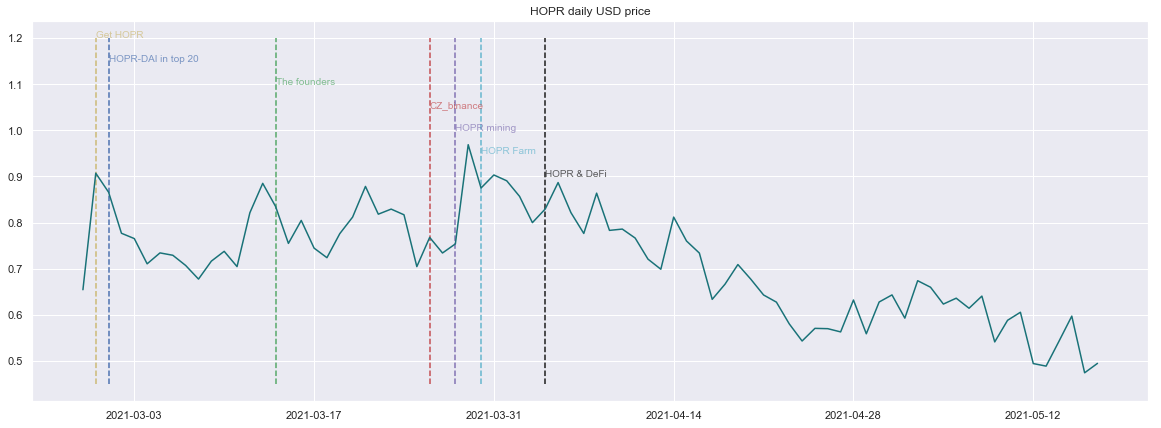

In [54]:
le = 1.2
ls = 0.45

fig, (ax) = plt.subplots(figsize=(20, 7))
ax.plot(t, d_h, color=color1)
ax.set_title('HOPR daily USD price')
ax.vlines(t[a], ls, le, linestyle='dashed', color='y')
ax.text(t[a], y=le, s='Get HOPR', alpha=0.7, color='y')
ax.vlines(t[b], ls, le, linestyle='dashed', color='b')
ax.text(t[b], y=(le-0.05), s='HOPR-DAI in top 20', alpha=0.7, color='b')
ax.vlines(t[c], ls, le, linestyle='dashed', color='g')
ax.text(t[c], y=(le-0.1), s='The founders', alpha=0.7, color='g')
ax.vlines(t[d], ls, le, linestyle='dashed', color='r')
ax.text(t[d], y=(le-0.15), s='CZ_binance', alpha=0.7, color='r')
ax.vlines(t[e], ls, le, linestyle='dashed', color='m')
ax.text(t[e], y=(le-0.2), s='HOPR mining', alpha=0.7, color='m')
ax.vlines(t[f], ls, le, linestyle='dashed', color='c')
ax.text(t[f], y=(le-0.25), s='HOPR Farm', alpha=0.7, color='c')
ax.vlines(t[h], ls, le, linestyle='dashed', color='k')
ax.text(t[h], y=(le-0.3), s='HOPR & DeFi', alpha=0.7, color='k')
plt.show()

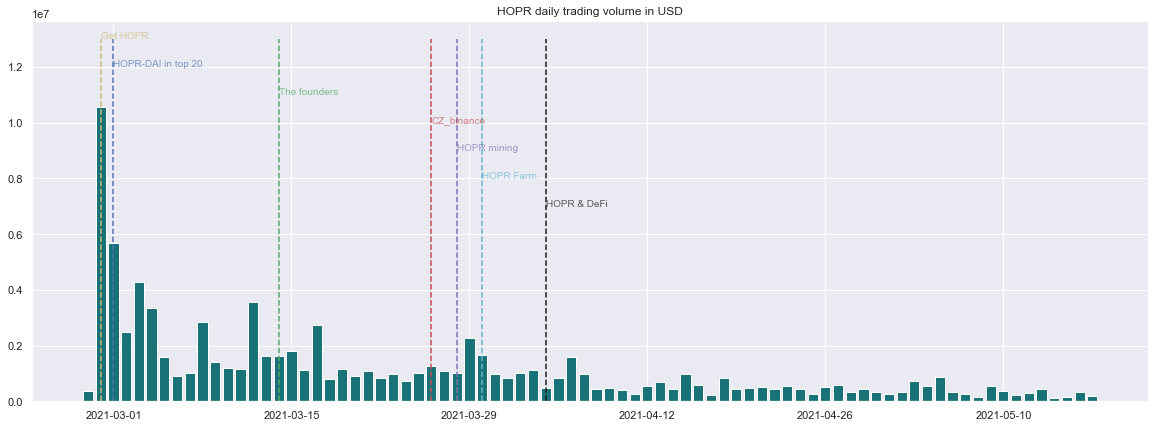

In [55]:
le = 13000000
ls = 0

fig, (ax) = plt.subplots(figsize=(20, 7))
ax.bar(t, usdvol, color=color1)
ax.set_title('HOPR daily trading volume in USD')
ax.vlines(t[a], ls, le, linestyle='dashed', color='y')
ax.text(t[a], y=le, s='Get HOPR', alpha=0.7, color='y')
ax.vlines(t[b], ls, le, linestyle='dashed', color='b')
ax.text(t[b], y=(le-1000000), s='HOPR-DAI in top 20', alpha=0.7, color='b')
ax.vlines(t[c], ls, le, linestyle='dashed', color='g')
ax.text(t[c], y=(le-2000000), s='The founders', alpha=0.7, color='g')
ax.vlines(t[d], ls, le, linestyle='dashed', color='r')
ax.text(t[d], y=(le-3000000), s='CZ_binance', alpha=0.7, color='r')
ax.vlines(t[e], ls, le, linestyle='dashed', color='m')
ax.text(t[e], y=(le-4000000), s='HOPR mining', alpha=0.7, color='m')
ax.vlines(t[f], ls, le, linestyle='dashed', color='c')
ax.text(t[f], y=(le-5000000), s='HOPR Farm', alpha=0.7, color='c')
ax.vlines(t[h], ls, le, linestyle='dashed', color='k')
ax.text(t[h], y=(le-6000000), s='HOPR & DeFi', alpha=0.7, color='k')
plt.show()

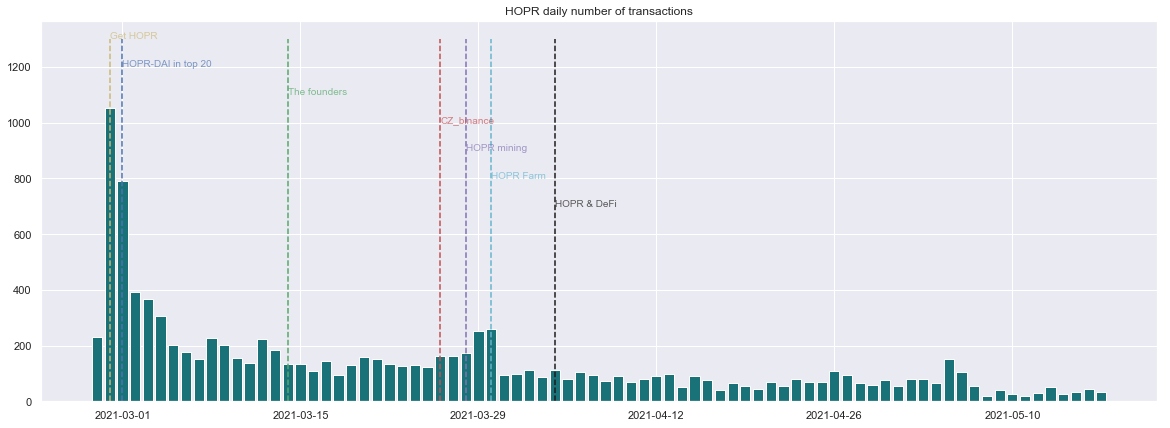

In [56]:
le = 1300
ls = 0

fig, (ax) = plt.subplots(figsize=(20, 7))
ax.bar(t, Txns, color=color1)
ax.set_title('HOPR daily number of transactions')
ax.vlines(t[a], ls, le, linestyle='dashed', color='y')
ax.text(t[a], y=le, s='Get HOPR', alpha=0.7, color='y')
ax.vlines(t[b], ls, le, linestyle='dashed', color='b')
ax.text(t[b], y=(le-100), s='HOPR-DAI in top 20', alpha=0.7, color='b')
ax.vlines(t[c], ls, le, linestyle='dashed', color='g')
ax.text(t[c], y=(le-200), s='The founders', alpha=0.7, color='g')
ax.vlines(t[d], ls, le, linestyle='dashed', color='r')
ax.text(t[d], y=(le-300), s='CZ_binance', alpha=0.7, color='r')
ax.vlines(t[e], ls, le, linestyle='dashed', color='m')
ax.text(t[e], y=(le-400), s='HOPR mining', alpha=0.7, color='m')
ax.vlines(t[f], ls, le, linestyle='dashed', color='c')
ax.text(t[f], y=(le-500), s='HOPR Farm', alpha=0.7, color='c')
ax.vlines(t[h], ls, le, linestyle='dashed', color='k')
ax.text(t[h], y=(le-600), s='HOPR & DeFi', alpha=0.7, color='k')
plt.show()

#### Traders activity

#### Source: swaps in a 2 weeks period, 1-1 week before and after the CZ_Binance post.

In [57]:
url = 'https://api.thegraph.com/subgraphs/name/uniswap/uniswap-v2'

data_swb = '''
{
  swaps(
    orderBy: timestamp,
    orderDirection: asc,
    first: 1000,
    where: {
      pair: "0x92c2fc5f306405eab0ff0958f6d85d7f8892cf4d",
      timestamp_gte: 1616154120
      timestamp_lte: 1616758920
    }
  ) {
    transaction {
      id
      blockNumber
    }
    timestamp
    sender
    to
    amount0In
    amount1In
    amount0Out
    amount1Out
    amountUSD
  }
}
'''

response_swb = requests.post(url,json={'query': data_swb})
data_swb = json.loads(response_swb.text)

In [58]:
df_swb = pd.DataFrame((pd.DataFrame(data_swb)).iloc[0][0])

In [59]:
df_swb["cz_time"] = "before"

In [60]:
#dataframe the week before CZ_binance - df_swb
df_swb.head(5)

,amount0In,amount0Out,amount1In,amount1Out,amountUSD,sender,timestamp,to,transaction,cz_time
0,11540.960116649079100919,0,0,15107.442163827982123885,11568.96699034467407598726279883601,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,1616154285,0xa92dda19aa92bf20867743ee631afee83524d835,"{'blockNumber': '12068969', 'id': '0x3b98cb46b...",before
1,13266.111131454951979882,0,0,17338.894232318256411888,13291.71777032094706397487945290441,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,1616155718,0xfd867fa6fa9dea501dd21d84d218b9dfecc29678,"{'blockNumber': '12069082', 'id': '0x3924e0d49...",before
2,4514.567849816094968317,0,0,5894.034501494987234893,4519.034011728234596539113284238124,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,1616156152,0x734259e535bdc2fe0ff473d7605c8854ea37e07c,"{'blockNumber': '12069112', 'id': '0x906f18594...",before
3,635.884685052660725989,0,0,829.918510284651275652,634.4380550183861822592649277314154,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,1616156883,0x8eb3d5a905930c6ccf60f5b6810987a06dbb9901,"{'blockNumber': '12069164', 'id': '0xf93e2ae66...",before
4,1946.556132830518391206,0,0,2540.120192707003953106,1942.525154018736559712001401121727,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,1616156966,0x21b0f1e67ce41e4964c3f27bbad72031a4e6cf1d,"{'blockNumber': '12069169', 'id': '0x6c5714231...",before


In [61]:
url = 'https://api.thegraph.com/subgraphs/name/uniswap/uniswap-v2'

data_swa = '''
{
  swaps(
    orderBy: timestamp,
    orderDirection: asc,
    first: 1000,
    where: {
      pair: "0x92c2fc5f306405eab0ff0958f6d85d7f8892cf4d",
      timestamp_gte: 1616758980
      timestamp_lte: 1617360180
    }
  ) {
    transaction {
      id
      blockNumber
    }
    timestamp
    sender
    to
    amount0In
    amount1In
    amount0Out
    amount1Out
    amountUSD
  }
}
'''

response_swa = requests.post(url,json={'query': data_swa})
data_swa = json.loads(response_swa.text)

In [62]:
df_swa = pd.DataFrame((pd.DataFrame(data_swa)).iloc[0][0])

In [63]:
df_swa["cz_time"] = "after"

In [64]:
#the week after the cz_binance - df_swa
df_swa.head(5)

,amount0In,amount0Out,amount1In,amount1Out,amountUSD,sender,timestamp,to,transaction,cz_time
0,500.189379677581400693,0,0,684.166803193995787593,500.7051036252164323953958777281076,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,1616759147,0x54b8f6d3d3314543f3c542add8322abf68c0289c,"{'blockNumber': '12114445', 'id': '0x8f09a38f7...",after
1,0,462.076127131841489741,635.842720377173906986,0,461.9076423675626723621885241990249,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,1616759381,0xa478c2975ab1ea89e8196811f51a7b7ade33eb11,"{'blockNumber': '12114461', 'id': '0xc736584b1...",after
2,0,75493.050485504024986294,104382.1916,0,75653.4205726874854412851011863574,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,1616760383,0x22f9dcf4647084d6c31b2765f6910cd85c178c18,"{'blockNumber': '12114539', 'id': '0x7e2f4156f...",after
3,2490.64542849,0,0,3438.984297670477389932,2495.237072950592459474214203889614,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,1616760842,0xec00fbfde8a394e14614b4d9ccbbfa4df6aa3ca7,"{'blockNumber': '12114563', 'id': '0xf0525ac19...",after
4,0,386.268358806172895547,536.487062920399501928,0,386.3043406977581851941883263559032,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,1616761576,0xa478c2975ab1ea89e8196811f51a7b7ade33eb11,"{'blockNumber': '12114616', 'id': '0x5be45c3c2...",after


In [65]:
#merged dataframe about the time period of 19/03/2021-02/04/2021 - df-sw

In [66]:
df_sw = df_swb.append([df_swa],ignore_index=True)

In [67]:
df_sw[['amount0In', 'amount0Out', 'amount1In', 'amount1Out', 'amountUSD', 'timestamp']] = df_sw[['amount0In', 'amount0Out', 'amount1In', 'amount1Out', 'amountUSD', 'timestamp']].apply(pd.to_numeric)

In [68]:
df_sw['s_price'] = df_sw['amount0Out']/df_sw['amount1In']
df_sw['b_price'] = df_sw['amount0In']/df_sw['amount1Out']

In [69]:
df_sw['s_price']=df_sw['s_price'].fillna(0)
df_sw['b_price']=df_sw['b_price'].fillna(0)

In [70]:
#added variables: price ('price'), transaction category - buy or sell ('trans_cat'), price category('amountUSD_cat'), date format time ('time_r')

In [71]:
df_sw['price'] = df_sw['s_price']+df_sw['b_price']

In [72]:
df_sw['trans_cat'] = df_sw['b_price'].apply(lambda x:'buy' if x > 0 else 'sell')

In [73]:
df_sw['amountUSD_cat'] = df_sw['amountUSD'].apply(lambda x:'<$1000' if x < 1000 else ('<$2000' if x >= 1000 and x < 2000 else ('<$5000' if x >= 2000 and x < 5000 else (' <$10000' if x >= 5000 and x < 10000 else '>=$10000'))))

In [74]:
df_sw['time_r'] = pd.to_datetime(df_sw['timestamp'], unit='s').apply(lambda x: x.date())

In [75]:
df_sw1 = df_sw[['time_r', 'trans_cat', 'sender', "to", 'amountUSD', 'amountUSD_cat', 'price', 'transaction', 'cz_time']]

In [76]:
#dropping the transactions where the sender and the receiver are identical

In [77]:
df_sw1['sen_to_equal'] = df_sw1["sender"] == df_sw1["to"]

C:\Users\szany\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [78]:
double_check = df_sw1.groupby(['sen_to_equal']).count()
double_check

,time_r,trans_cat,sender,to,amountUSD,amountUSD_cat,price,transaction,cz_time
sen_to_equal,,,,,,,,,
False,1658,1658,1658,1658,1658,1658,1658,1658,1658
True,59,59,59,59,59,59,59,59,59


In [79]:
doubles = df_sw1[df_sw1['sen_to_equal'] == True].index

In [80]:
df_sw2 = (df_sw1.drop(doubles)).reset_index(drop=True)

In [81]:
##dataframe about the transactions between 03/19-04/02 - df_sw2

In [82]:
df_sw2.head(5)

,time_r,trans_cat,sender,to,amountUSD,amountUSD_cat,price,transaction,cz_time,sen_to_equal
0,2021-03-19,buy,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0xa92dda19aa92bf20867743ee631afee83524d835,11568.966990,>=$10000,0.763925,"{'blockNumber': '12068969', 'id': '0x3b98cb46b...",before,False
1,2021-03-19,buy,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0xfd867fa6fa9dea501dd21d84d218b9dfecc29678,13291.717770,>=$10000,0.765107,"{'blockNumber': '12069082', 'id': '0x3924e0d49...",before,False
2,2021-03-19,buy,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x734259e535bdc2fe0ff473d7605c8854ea37e07c,4519.034012,<$5000,0.765955,"{'blockNumber': '12069112', 'id': '0x906f18594...",before,False
3,2021-03-19,buy,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x8eb3d5a905930c6ccf60f5b6810987a06dbb9901,634.438055,<$1000,0.766201,"{'blockNumber': '12069164', 'id': '0xf93e2ae66...",before,False
4,2021-03-19,buy,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x21b0f1e67ce41e4964c3f27bbad72031a4e6cf1d,1942.525154,<$2000,0.766324,"{'blockNumber': '12069169', 'id': '0x6c5714231...",before,False


#### Before and after CZ_binance dataset

#### Traders activity

In [83]:
df_sw_tr_vol = df_sw2.groupby(['to']).agg({'amountUSD': ['sum']} )
df_sw_tr_act = df_sw2.groupby(['to']).agg({'to': ['count']} )

In [84]:
df_sw_tr_volb = df_sw_tr_vol.reset_index()
df_sw_tr_actb = df_sw_tr_act.reset_index()

In [85]:
df_sw_tr_volb.columns = ["to", "amountUSD_sum"]
df_sw_tr_actb.columns = ["to", "transaction_count"]

In [86]:
top_volume = (df_sw_tr_volb.sort_values(by=["amountUSD_sum"], ascending=False)).reset_index(drop=True)
top_activity = (df_sw_tr_actb.sort_values(by=["transaction_count"], ascending=False)).reset_index(drop=True)

In [87]:
#Top trades by the number of transactions ("top_activity") and the aggregated amount of trading volume ("top_volume")
top_volume.head(5)

,to,amountUSD_sum
0,0xa478c2975ab1ea89e8196811f51a7b7ade33eb11,2.571196e+06
1,0xc8e7eb18761831440e6af12207377bf9b67b7162,2.063217e+06
2,0x60941a852158eafba256b5844421984cf19c402b,6.977864e+05
3,0xae461ca67b15dc8dc81ce7615e0320da1a9ab8d5,6.476352e+05
4,0xb20bd5d04be54f870d5c0d3ca85d82b34b836405,4.353734e+05


In [88]:
top_activity.head(5)

,to,transaction_count
0,0xa478c2975ab1ea89e8196811f51a7b7ade33eb11,403
1,0xb20bd5d04be54f870d5c0d3ca85d82b34b836405,85
2,0xc8e7eb18761831440e6af12207377bf9b67b7162,72
3,0xae461ca67b15dc8dc81ce7615e0320da1a9ab8d5,65
4,0x74de5d4fcbf63e00296fd95d33236b9794016631,35


In [89]:
#based on the weight of the Nr1 trader, the top 10 trader's chart includes only the [1:11] range 

In [90]:
t_v = (top_volume.drop(columns=['amountUSD_sum'])).iloc[1:11, ]
t_a = (top_activity.drop(columns=['transaction_count'])).iloc[1:11, ]

In [91]:
#the overlap between the first 10 most active and biggest volume traders 

In [92]:
overlap = (t_v.to.isin(t_a.to).astype(int)).sum()
overlap

5

In [93]:
t_v["top_traders_v"] = "top_vol"
t_a["top_traders_a"] = "top_act"

In [94]:
t_v.columns=["to", "top_traders_v"]
t_a.columns=["to", "top_traders_a"]

In [95]:
df_v = pd.merge(df_sw2, t_v, how="left", on=["to"])

In [96]:
df_va = pd.merge(df_v, t_a, how="left", on=["to"])

In [97]:
t_v_p = df_va[(df_va["top_traders_v"] == "top_vol")]
t_a_p = df_va[(df_va["top_traders_a"] == "top_act")]

In [98]:
def xyz(col):
    if col['trans_cat'] == "sell":
        val = col['amountUSD']*-1
    else:
        val = col['amountUSD']
    return val

In [99]:
t_v_p['amountUSD_pos'] = t_v_p.apply(xyz, axis=1)

C:\Users\szany\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [100]:
#subset of transactions, initiated by the biggest traders - t_v_p, t_v_a
t_v_p.head(5)

,time_r,trans_cat,sender,to,amountUSD,amountUSD_cat,price,transaction,cz_time,sen_to_equal,top_traders_v,top_traders_a,amountUSD_pos
1,2021-03-19,buy,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0xfd867fa6fa9dea501dd21d84d218b9dfecc29678,13291.717770,>=$10000,0.765107,"{'blockNumber': '12069082', 'id': '0x3924e0d49...",before,False,top_vol,top_act,13291.717770
7,2021-03-19,buy,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0xc8e7eb18761831440e6af12207377bf9b67b7162,22994.401905,>=$10000,0.767283,"{'blockNumber': '12069199', 'id': '0x3cc716757...",before,False,top_vol,top_act,22994.401905
12,2021-03-19,buy,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0xc8e7eb18761831440e6af12207377bf9b67b7162,24027.065983,>=$10000,0.774929,"{'blockNumber': '12069358', 'id': '0xb006e379c...",before,False,top_vol,top_act,24027.065983
23,2021-03-19,buy,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0xc8e7eb18761831440e6af12207377bf9b67b7162,23692.825917,>=$10000,0.789051,"{'blockNumber': '12069976', 'id': '0xdec4a8bcb...",before,False,top_vol,top_act,23692.825917
25,2021-03-19,sell,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0xb20bd5d04be54f870d5c0d3ca85d82b34b836405,967.789830,<$1000,0.785326,"{'blockNumber': '12070006', 'id': '0x81c2b370f...",before,False,top_vol,top_act,-967.789830


In [101]:
#the waterfall chart includes the trading activity of the biggest (by volume) HOPR traders by volume

In [102]:
wat_fal_v = t_v_p.groupby(["time_r", "trans_cat"]).agg({'amountUSD_pos': ['sum']} )

In [103]:
wat_fal_v2 = wat_fal_v.reset_index()
wat_fal_v2.columns = ["time_r", "trans_cat", "amountUSD_pos"]

In [104]:
from waterfall_ax import WaterfallChart

In [105]:
wat_fal_v2["amountUSD_pos2"] = wat_fal_v2["amountUSD_pos"]/1000

In [106]:
ab = list(wat_fal_v2.amountUSD_pos2.cumsum())

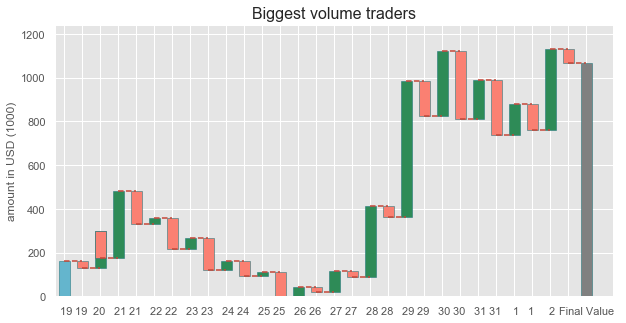

In [107]:
plt.style.use('ggplot')

step_names = [' 19','19 ', '20 ', '20 ', ' 21', '21 ', ' 22', '22 ', ' 23', '23 ', ' 24', '24 ', ' 25', '25 ', ' 26', '26 ', ' 27', '27 ', ' 28', '28 ', ' 29', '29 ', ' 30', '30 ', ' 31', '31 ', ' 1', '1 ', ' 2', ' ']
metric_name = 'amount in USD (1000)'
bar_kwargs = {'edgecolor': color1}
line_kwargs = {'color': color3}

# Plot
waterfall = WaterfallChart(ab, step_names= step_names, metric_name= metric_name)

#waterfall = WaterfallChart(ab, step_names = step_names, metric_name = metric_name,last_step_label = last_step_label)
wf_ax = waterfall.plot_waterfall(title='Biggest volume traders', bar_labels = False, bar_kwargs = bar_kwargs, line_kwargs = line_kwargs)

#### Daily trading activity

In [108]:
after_czb00 = df_sw[(df_sw["cz_time"] == "after")]
before_czb00 = df_sw[(df_sw["cz_time"] == "before")]

In [109]:
after_czb0 = (after_czb00.sort_values(by=['time_r'])).reset_index()
before_czb0 = (before_czb00.sort_values(by=['time_r'])).reset_index()

In [110]:
after_czb = after_czb0[['time_r', 'trans_cat', 'sender', "to", 'amountUSD', 'amountUSD_cat', 'price', 'transaction', 'index']]
before_czb = before_czb0[['time_r', 'trans_cat', 'sender', "to", 'amountUSD', 'amountUSD_cat', 'price', 'transaction', 'index']]

In [111]:
#subset of datasets separated by CZ_Binance tweet - after_czb, before_czb
after_czb.head(5)

,time_r,trans_cat,sender,to,amountUSD,amountUSD_cat,price,transaction,index
0,2021-03-26,buy,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x54b8f6d3d3314543f3c542add8322abf68c0289c,500.705104,<$1000,0.731093,"{'blockNumber': '12114445', 'id': '0x8f09a38f7...",830
1,2021-03-26,buy,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0xd40bf250ac782434155b93d91de08236f50460a6,2663.891353,<$5000,0.777524,"{'blockNumber': '12116841', 'id': '0x4dbb52434...",908
2,2021-03-26,sell,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0xa478c2975ab1ea89e8196811f51a7b7ade33eb11,3173.890035,<$5000,0.772890,"{'blockNumber': '12116804', 'id': '0x15d19a8f6...",907
3,2021-03-26,sell,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0xa478c2975ab1ea89e8196811f51a7b7ade33eb11,1643.828179,<$2000,0.773117,"{'blockNumber': '12116776', 'id': '0xa4e34f919...",906
4,2021-03-26,buy,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x24cb87d728094fe22612530d8dbc5c300eadb187,4189.020731,<$5000,0.777656,"{'blockNumber': '12116658', 'id': '0x5439f0219...",905


In [112]:
after_usd_s = after_czb.groupby(['time_r', 'amountUSD_cat']).agg({'amountUSD': ['sum']} ).unstack('amountUSD_cat')
before_usd_s = before_czb.groupby(['time_r', 'amountUSD_cat']).agg({'amountUSD': ['sum']} ).unstack('amountUSD_cat')

In [113]:
after_usd_s.columns = ['<$10000', '<$1000', '<$2000', '<$5000','>=$10000']
before_usd_s.columns = ['<$10000', '<$1000', '<$2000', '<$5000','>=$10000']

In [114]:
# composition of the trading activity before and after CZ_Binance, by the volume of the trading
#(consider the non-linear structure of the labeling!)

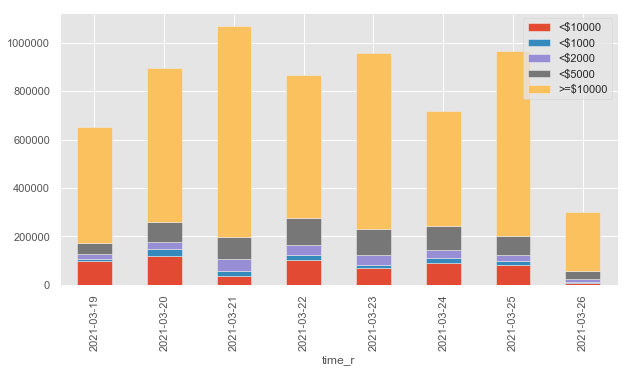

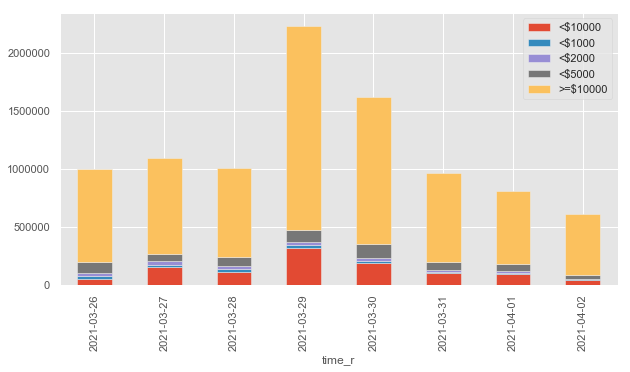

In [115]:
before_usd_s.plot.bar(stacked=True, figsize=(10,5))
after_usd_s.plot.bar(stacked=True, figsize=(10,5))

In [116]:
# composition of the trading activity before and after CZ_Binance, by the normalized volume of the trading
#(consider the non-linear structure of the labeling!)

In [117]:
after_usd_s2 = after_usd_s.div(after_usd_s.sum(1), axis=0)
before_usd_s2 = before_usd_s.div(before_usd_s.sum(1), axis=0)

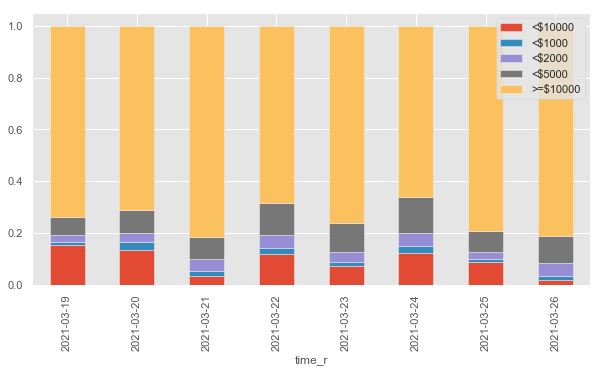

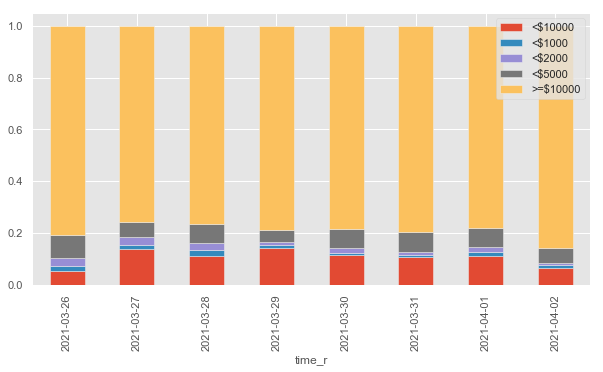

In [118]:
before_usd_s2.plot.bar(stacked=True, figsize=(10,5))
after_usd_s2.plot.bar(stacked=True, figsize=(10,5))

In [119]:
# composition of the trading activity before and after CZ_Binance, by the normalized number of transactions
#(consider the non-linear structure of the labeling!)

In [120]:
after_usd_c = after_czb.groupby('time_r')['amountUSD_cat'].value_counts(normalize=True).unstack('amountUSD_cat')
before_usd_c = before_czb.groupby('time_r')['amountUSD_cat'].value_counts(normalize=True).unstack('amountUSD_cat')

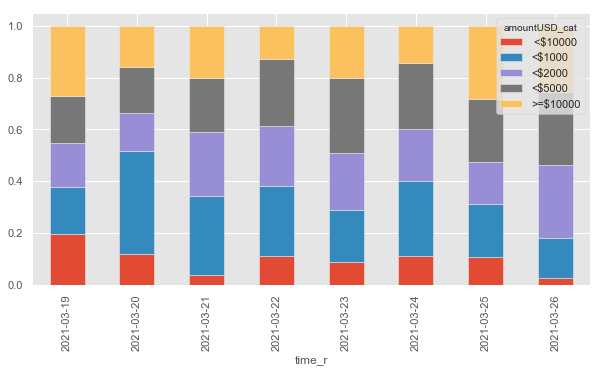

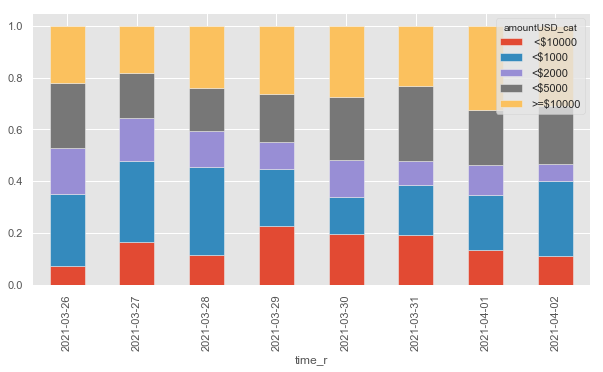

In [121]:
before_usd_c.plot.bar(stacked=True, figsize=(10,5))
after_usd_c.plot.bar(stacked=True, figsize=(10,5))

#### Conclusions
HOPR has a strong, negative correlation with ETH.

However, based on the scaled dataset, the trend in the correlation between HOPR and ETH was weak positive until the begining of April, when it flipped.

HOPR has moderate, positive correlation with BTW.

CZ_Binance effect

The CZ_Binance tweet influenced the price, the trading volume, and the number of transactions.

The immediate effect was the strongest on the 29th and 30th of March, when besides the increase in the price, the volume of the trade doubled (2 times higher on the 29th and 1,5 times higher on the 30th) compared to the days before the tweet.

The tweet also influenced the structure of the trading.

The increase of the trading volume was caused mostly by big players (1000USD and plus) it also raised the attention of the 5000USD -10000USD group as well, which is more visible in the number of transactions.

5 traders out of the top 10 highest volume traders also appears in the top 10 most active trader (measured by the number of transactions initiated within the given period)
